# SARIMA Model For Rajasthan Toll Traffic Forecasting

# Importing Data & Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib    
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
Raj = pd.read_csv('Raj_Updated_2015 to 2022.csv', low_memory=False)

In [3]:
Raj.shape

(361, 87)

In [4]:
Raj.head()

,Project Name,ClassName,PaymentCategory,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,...,Jun21,Jul21,Aug21,Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,March22
0,BPPTL-TP01,3 Axle Vehicle,Convoy,0,0,0,0,0,0,0,...,1,0,0,1,1,2,1,1,0,1
1,BPPTL-TP01,3 Axle Vehicle,Exempt,0,0,7,2,10,3,2,...,1,1,0,1,0,0,0,1,1,3
2,BPPTL-TP01,3 Axle Vehicle,Local,0,0,3,9,9,16,15,...,0,0,0,0,0,0,0,0,0,0
3,BPPTL-TP01,3 Axle Vehicle,Monthly,0,0,11,14,8,9,11,...,1,0,1,0,0,0,0,0,1,0
4,BPPTL-TP01,3 Axle Vehicle,NonTollable,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Raj.describe()

,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,Nov15,Dec15,Jan16,...,Jun21,Jul21,Aug21,Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,March22
count,361.0,361.0,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,...,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.0,0.0,106.911357,95.795014,109.487535,108.019391,109.512465,110.789474,112.520776,113.700831,...,130.864266,140.581717,140.584488,135.606648,145.872576,148.288089,155.479224,142.155125,161.498615,150.955679
std,0.0,0.0,497.052817,442.858533,539.830066,497.928160,505.687052,484.042526,504.236877,524.113038,...,649.735832,692.351360,694.040760,664.382454,727.861018,731.935289,764.994430,714.894431,796.190702,748.113326
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,5.000000,8.000000,11.000000,9.000000,10.000000,9.000000,10.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,0.0,0.0,4937.000000,4508.000000,7025.000000,4965.000000,5034.000000,4567.000000,4943.000000,5218.000000,...,6137.000000,6318.000000,6312.000000,6170.000000,6953.000000,6003.000000,6975.000000,6850.000000,7343.000000,7255.000000


# Exploratory Data Analysis

In [6]:
#checking for Null Values

Raj.isnull().sum()

Project Name       0
ClassName          1
PaymentCategory    1
Apr15              0
May15              0
                  ..
Nov21              0
Dec21              0
Jan22              0
Feb22              0
March22            0
Length: 87, dtype: int64

In [7]:
#Dropping off 'PaymentCategory'
Raj = Raj.drop(labels=['PaymentCategory'], axis=1)

In [8]:
display(Raj)

,Project Name,ClassName,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,Nov15,...,Jun21,Jul21,Aug21,Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,March22
0,BPPTL-TP01,3 Axle Vehicle,0,0,0,0,0,0,0,0,...,1,0,0,1,1,2,1,1,0,1
1,BPPTL-TP01,3 Axle Vehicle,0,0,7,2,10,3,2,2,...,1,1,0,1,0,0,0,1,1,3
2,BPPTL-TP01,3 Axle Vehicle,0,0,3,9,9,16,15,16,...,0,0,0,0,0,0,0,0,0,0
3,BPPTL-TP01,3 Axle Vehicle,0,0,11,14,8,9,11,19,...,1,0,1,0,0,0,0,0,1,0
4,BPPTL-TP01,3 Axle Vehicle,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,BPPTL-TP04,Two wheelers,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357,BPPTL-TP04,Two wheelers,0,0,2,26,153,2,5,6,...,4,2,2,1,1,1,1,1,1,1
358,BPPTL-TP04,Unable to classify,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
359,BPPTL-TP04,Unable to classify,0,0,122,170,3468,33,15,18,...,37,39,47,47,42,47,44,31,41,38


In [9]:
#Printing Vehicle Type Category
Raj.ClassName.unique()

array(['3 Axle Vehicle', 'Bus', 'CJV', 'LCV', 'MAV', 'Oversized',
       'Three wheelers', 'Tractor with Trailer',
       'Tractor without Trailer', 'Truck 2 axle', 'Two wheelers',
       'Unable to classify', nan], dtype=object)

In [10]:
#Removing insignificant vehicle types from the dataset
Raj = Raj[(Raj.ClassName != "Two wheelers") & (Raj.ClassName != "Three wheelers") & (Raj.ClassName != "Oversized") & 
          (Raj.ClassName != "Unable to classify") & (Raj.ClassName != "Tractor with Trailer") & 
          (Raj.ClassName != "Tractor without Trailer")]

In [11]:
display(Raj)

,Project Name,ClassName,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,Nov15,...,Jun21,Jul21,Aug21,Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,March22
0,BPPTL-TP01,3 Axle Vehicle,0,0,0,0,0,0,0,0,...,1,0,0,1,1,2,1,1,0,1
1,BPPTL-TP01,3 Axle Vehicle,0,0,7,2,10,3,2,2,...,1,1,0,1,0,0,0,1,1,3
2,BPPTL-TP01,3 Axle Vehicle,0,0,3,9,9,16,15,16,...,0,0,0,0,0,0,0,0,0,0
3,BPPTL-TP01,3 Axle Vehicle,0,0,11,14,8,9,11,19,...,1,0,1,0,0,0,0,0,1,0
4,BPPTL-TP01,3 Axle Vehicle,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,BPPTL-TP04,Truck 2 axle,0,0,74,66,22,77,86,75,...,0,0,0,0,0,0,0,0,0,0
348,BPPTL-TP04,Truck 2 axle,0,0,279,253,89,309,308,271,...,904,998,1026,959,991,818,1032,1016,1132,1159
349,BPPTL-TP04,Truck 2 axle,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,BPPTL-TP04,Truck 2 axle,0,0,1,2,155,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Drop Month Apr
Raj.loc[:,'Apr15'] = 0

In [13]:
#Drop Month May
Raj.loc[:,'May15'] = 0

In [14]:
#Drop Month June
Raj.loc[:,'Jun15'] = 0

In [15]:
display(Raj)

,Project Name,ClassName,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,Nov15,...,Jun21,Jul21,Aug21,Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,March22
0,BPPTL-TP01,3 Axle Vehicle,0,0,0,0,0,0,0,0,...,1,0,0,1,1,2,1,1,0,1
1,BPPTL-TP01,3 Axle Vehicle,0,0,0,2,10,3,2,2,...,1,1,0,1,0,0,0,1,1,3
2,BPPTL-TP01,3 Axle Vehicle,0,0,0,9,9,16,15,16,...,0,0,0,0,0,0,0,0,0,0
3,BPPTL-TP01,3 Axle Vehicle,0,0,0,14,8,9,11,19,...,1,0,1,0,0,0,0,0,1,0
4,BPPTL-TP01,3 Axle Vehicle,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,BPPTL-TP04,Truck 2 axle,0,0,0,66,22,77,86,75,...,0,0,0,0,0,0,0,0,0,0
348,BPPTL-TP04,Truck 2 axle,0,0,0,253,89,309,308,271,...,904,998,1026,959,991,818,1032,1016,1132,1159
349,BPPTL-TP04,Truck 2 axle,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,BPPTL-TP04,Truck 2 axle,0,0,0,2,155,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#Summation of indivisual traffic data points under the same classsName for removing data redundancy
Raj=Raj.groupby(["ClassName", "Project Name"], as_index=False)['Apr15', 'May15', 'Jun15', 'Jul15', 'Aug15', 'Sep15', 'Oct15','Nov15','Dec15','Jan16','Feb16','Mar16','Apr16','May16','Jun16','Jul16','Aug16','Sep16','Oct16','Nov16','Dec16','Jan17','Feb17','Mar17','Apr17','May17','Jun17','Jul17','Aug17','Sep17','Oct17','Nov17','Dec17','Jan18','Feb18','Mar18','Apr18','May18','Jun18','Jul18','Aug18','Sep18','Oct18','Nov18','Dec18','Jan19','Feb19','Mar19','Apr19','May19','Jun19','Jul19','Aug19','Sep19','Oct19','Nov19','Dec19','Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20','Nov20','Dec20','Jan21','Feb21','Mar21','Apr21','May21','Jun21','Jul21','Aug21','Sep21','Oct21','Nov21','Dec21','Jan22','Feb22','March22'
 ].sum()

In [17]:
Raj.head()

,ClassName,Project Name,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,Nov15,...,Jun21,Jul21,Aug21,Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,March22
0,3 Axle Vehicle,BPPTL-TP01,0,0,0,663,653,703,775,664,...,481,464,463,485,528,436,538,477,517,488
1,3 Axle Vehicle,BPPTL-TP02,0,0,0,645,655,740,730,627,...,526,468,443,419,496,412,484,450,552,522
2,3 Axle Vehicle,BPPTL-TP03,0,0,0,1155,1211,1236,1301,1150,...,824,822,818,770,917,767,878,810,915,917
3,3 Axle Vehicle,BPPTL-TP04,0,0,0,1121,732,1228,1270,1139,...,812,812,803,767,920,765,877,814,914,915
4,Bus,BPPTL-TP01,0,0,0,174,174,179,185,202,...,158,258,298,373,335,389,361,277,357,341


In [18]:
Raj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 86 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ClassName     24 non-null     object
 1   Project Name  24 non-null     object
 2   Apr15         24 non-null     int64 
 3   May15         24 non-null     int64 
 4   Jun15         24 non-null     int64 
 5   Jul15         24 non-null     int64 
 6   Aug15         24 non-null     int64 
 7   Sep15         24 non-null     int64 
 8   Oct15         24 non-null     int64 
 9   Nov15         24 non-null     int64 
 10  Dec15         24 non-null     int64 
 11  Jan16         24 non-null     int64 
 12  Feb16         24 non-null     int64 
 13  Mar16         24 non-null     int64 
 14  Apr16         24 non-null     int64 
 15  May16         24 non-null     int64 
 16  Jun16         24 non-null     int64 
 17  Jul16         24 non-null     int64 
 18  Aug16         24 non-null     int64 
 19  Sep16     

In [19]:
#Month wise traffic data converted to Yearly summation of traffic for respective months

In [20]:
Raj['Jul-Dec-15'] = Raj.loc[0 : 350,['Apr15','May15','Jun15','Jul15','Aug15','Sep15','Oct15','Nov15','Dec15']].sum(axis = 1)

Raj['Jan-Dec-16'] = Raj.loc[0 : 350,['Jan16','Feb16','Mar16','Apr16','May16','Jun16','Jul16','Aug16','Sep16','Oct16','Nov16','Dec16']].sum(axis = 1)

Raj['Jan-Dec-17'] = Raj.loc[0 : 350,['Jan17','Feb17','Mar17','Apr17','May17','Jun17','Jul17','Aug17','Sep17','Oct17','Nov17','Dec17']].sum(axis = 1)

Raj['Jan-Dec-18'] = Raj.loc[0 : 350,['Jan18','Feb18','Mar18','Apr18','May18','Jun18','Jul18','Aug18','Sep18','Oct18','Nov18','Dec18']].sum(axis = 1)

In [21]:
Raj['Jan-Dec-19'] = Raj.loc[0 : 350,['Jan19','Feb19','Mar19','Apr19','May19','Jun19','Jul19','Aug19','Sep19','Oct19','Nov19','Dec19']].sum(axis = 1)
Raj['Jan-Dec-20'] = Raj.loc[0 : 350,['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20','Nov20','Dec20']].sum(axis = 1)
Raj['Jan-Dec-21'] = Raj.loc[0 : 350,['Jan21','Feb21','Mar21','Apr21','May21','Jun21','Jul21','Aug21','Sep21','Oct21','Nov21','Dec21']].sum(axis = 1)
Raj['Jan-Mar-22'] = Raj.loc[0 : 350,['Jan22','Feb22','March22']].sum(axis = 1)

In [22]:
Raj.head()

,ClassName,Project Name,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,Nov15,...,Feb22,March22,Jul-Dec-15,Jan-Dec-16,Jan-Dec-17,Jan-Dec-18,Jan-Dec-19,Jan-Dec-20,Jan-Dec-21,Jan-Mar-22
0,3 Axle Vehicle,BPPTL-TP01,0,0,0,663,653,703,775,664,...,517,488,4173,7600,7234,5905,5953,5917,6132,1482
1,3 Axle Vehicle,BPPTL-TP02,0,0,0,645,655,740,730,627,...,552,522,4094,7190,6865,6461,6537,6069,5928,1524
2,3 Axle Vehicle,BPPTL-TP03,0,0,0,1155,1211,1236,1301,1150,...,915,917,7310,13089,12315,11432,10743,10132,10414,2642
3,3 Axle Vehicle,BPPTL-TP04,0,0,0,1121,732,1228,1270,1139,...,914,915,6733,13140,12370,11343,10721,9964,10341,2643
4,Bus,BPPTL-TP01,0,0,0,174,174,179,185,202,...,357,341,1112,2390,2481,2744,3014,2946,3464,975


In [23]:
#Annualizing Data


Raj['Jul-Dec-15']= 2*Raj['Jul-Dec-15']
Raj['Jan-Mar-22']= 4*Raj['Jan-Mar-22']

In [24]:
Raj.drop(index=23, axis=0, inplace=True)

In [25]:
print(Raj)

         ClassName Project Name  Apr15  May15  Jun15  Jul15  Aug15  Sep15  \
0   3 Axle Vehicle   BPPTL-TP01      0      0      0    663    653    703   
1   3 Axle Vehicle   BPPTL-TP02      0      0      0    645    655    740   
2   3 Axle Vehicle   BPPTL-TP03      0      0      0   1155   1211   1236   
3   3 Axle Vehicle   BPPTL-TP04      0      0      0   1121    732   1228   
4              Bus   BPPTL-TP01      0      0      0    174    174    179   
5              Bus   BPPTL-TP02      0      0      0    265    265    273   
6              Bus   BPPTL-TP03      0      0      0    317    307    343   
7              Bus   BPPTL-TP04      0      0      0    260    176    298   
8              CJV   BPPTL-TP01      0      0      0   1547   1515   1680   
9              CJV   BPPTL-TP02      0      0      0   2281   2349   2515   
10             CJV   BPPTL-TP03      0      0      0   2310   2397   2686   
11             CJV   BPPTL-TP04      0      0      0   2493   1861   3012   

In [26]:
#Toll wise summation
g_sum = Raj.groupby('Project Name', as_index=False).sum()
print(g_sum)

  Project Name  Apr15  May15  Jun15  Jul15  Aug15  Sep15  Oct15  Nov15  Dec15  \
0   BPPTL-TP01      0      0      0   5684   5871   6376   6637   6692   6835   
1   BPPTL-TP02      0      0      0   6745   7112   7644   7815   7935   8158   
2   BPPTL-TP03      0      0      0   8375   8797   9382   9420   9769   9793   
3   BPPTL-TP04      0      0      0   7974   6065   9147   9181   9742   9508   

   ...  Feb22  March22  Jul-Dec-15  Jan-Dec-16  Jan-Dec-17  Jan-Dec-18  \
0  ...  10120     9366       76190       83396       89801       91077   
1  ...  11640    10617       90818      100572      109036      113749   
2  ...  13751    12856      111072      118642      125943      129590   
3  ...  13220    12159      103234      118184      125684      127269   

   Jan-Dec-19  Jan-Dec-20  Jan-Dec-21  Jan-Mar-22  
0       99372       98521      108467      113732  
1      122384      114846      122627      129388  
2      136956      130986      145651      154724  
3      134088  

In [27]:
g_sum = g_sum.drop(labels=['Jul-Dec-15', 'Jan-Dec-16', 'Jan-Dec-17',  'Jan-Dec-18','Jan-Dec-19','Jan-Dec-20','Jan-Dec-21', 'Jan-Mar-22' ], axis=1)

In [28]:
print(g_sum)

  Project Name  Apr15  May15  Jun15  Jul15  Aug15  Sep15  Oct15  Nov15  Dec15  \
0   BPPTL-TP01      0      0      0   5684   5871   6376   6637   6692   6835   
1   BPPTL-TP02      0      0      0   6745   7112   7644   7815   7935   8158   
2   BPPTL-TP03      0      0      0   8375   8797   9382   9420   9769   9793   
3   BPPTL-TP04      0      0      0   7974   6065   9147   9181   9742   9508   

   ...  Jun21  Jul21  Aug21  Sep21  Oct21  Nov21  Dec21  Jan22  Feb22  March22  
0  ...   8368   8894   8766   8675   9182   9325   9961   8947  10120     9366  
1  ...   9601  10069   9826   9718  10234  10576  11140  10090  11640    10617  
2  ...  10839  12062  12334  11615  12464  12921  13313  12074  13751    12856  
3  ...  10294  11411  11520  10850  11804  12861  12688  11448  13220    12159  

[4 rows x 85 columns]


In [29]:
# Get sum of all rows as a new row in Dataframe
total = g_sum.sum()
total.name = 'Total'
# Assign sum of all rows of DataFrame as a new Row
g_sum = g_sum.append(total.transpose())
print(g_sum)

                                   Project Name  Apr15  May15  Jun15  Jul15  \
0                                    BPPTL-TP01      0      0      0   5684   
1                                    BPPTL-TP02      0      0      0   6745   
2                                    BPPTL-TP03      0      0      0   8375   
3                                    BPPTL-TP04      0      0      0   7974   
Total  BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04      0      0      0  28778   

       Aug15  Sep15  Oct15  Nov15  Dec15  ...  Jun21  Jul21  Aug21  Sep21  \
0       5871   6376   6637   6692   6835  ...   8368   8894   8766   8675   
1       7112   7644   7815   7935   8158  ...   9601  10069   9826   9718   
2       8797   9382   9420   9769   9793  ...  10839  12062  12334  11615   
3       6065   9147   9181   9742   9508  ...  10294  11411  11520  10850   
Total  27845  32549  33053  34138  34294  ...  39102  42436  42446  40858   

       Oct21  Nov21  Dec21  Jan22  Feb22  March22  
0       91

In [30]:
i = g_sum[(g_sum['Project Name'] == 'BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04')].index
i

Index(['Total'], dtype='object')

In [31]:
#Combining all 4 tolls under one category
Total_Traffic= g_sum[(g_sum['Project Name'] == 'BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04')]
Total_Traffic

,Project Name,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,Nov15,Dec15,...,Jun21,Jul21,Aug21,Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,March22
Total,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,0,0,0,28778,27845,32549,33053,34138,34294,...,39102,42436,42446,40858,43684,45683,47102,42559,48731,44998


In [32]:
#Dropping insignificant months(toll starts from July'15)

Total_Traffic= Total_Traffic.drop(labels=['Apr15', 'May15', 'Jun15'], axis=1)

In [33]:
print(Total_Traffic)

                                   Project Name  Jul15  Aug15  Sep15  Oct15  \
Total  BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04  28778  27845  32549  33053   

       Nov15  Dec15  Jan16  Feb16  Mar16  ...  Jun21  Jul21  Aug21  Sep21  \
Total  34138  34294  34519  36180  34881  ...  39102  42436  42446  40858   

       Oct21  Nov21  Dec21  Jan22  Feb22  March22  
Total  43684  45683  47102  42559  48731    44998  

[1 rows x 82 columns]


In [34]:
#Calculate month wise total traffic from all 4 tolls combined under one column 'Month_year'

In [35]:

df_unpivoted = Total_Traffic.melt(id_vars=['Project Name'], value_name='BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04')

In [36]:
df_unpivoted= df_unpivoted.rename(columns = {"variable":"Month_year"})
df_unpivoted

,Project Name,Month_year,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04
0,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Jul15,28778
1,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Aug15,27845
2,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Sep15,32549
3,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Oct15,33053
4,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Nov15,34138
...,...,...,...
76,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Nov21,45683
77,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Dec21,47102
78,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Jan22,42559
79,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Feb22,48731


In [37]:
#Month wise Totall Traffic
df_unpivoted.drop(['Project Name'], axis = 1)

,Month_year,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04
0,Jul15,28778
1,Aug15,27845
2,Sep15,32549
3,Oct15,33053
4,Nov15,34138
...,...,...
76,Nov21,45683
77,Dec21,47102
78,Jan22,42559
79,Feb22,48731


In [38]:
#Month_year(format) column to Date column conversion

In [39]:
df = pd.DataFrame()

df['date'] = pd.date_range('7/1/2015', periods=81, freq='M')  
print(df)

         date
0  2015-07-31
1  2015-08-31
2  2015-09-30
3  2015-10-31
4  2015-11-30
..        ...
76 2021-11-30
77 2021-12-31
78 2022-01-31
79 2022-02-28
80 2022-03-31

[81 rows x 1 columns]


In [40]:
pd.concat([df_unpivoted, df.reindex(df_unpivoted.index)], axis=1)

,Project Name,Month_year,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,date
0,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Jul15,28778,2015-07-31
1,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Aug15,27845,2015-08-31
2,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Sep15,32549,2015-09-30
3,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Oct15,33053,2015-10-31
4,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Nov15,34138,2015-11-30
...,...,...,...,...
76,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Nov21,45683,2021-11-30
77,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Dec21,47102,2021-12-31
78,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Jan22,42559,2022-01-31
79,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Feb22,48731,2022-02-28


In [41]:
df1= df_unpivoted.drop(labels=['Project Name'], axis=1)
df1.rename(columns = {'BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04':'Traffic'}, inplace = True)
df1

,Month_year,Traffic
0,Jul15,28778
1,Aug15,27845
2,Sep15,32549
3,Oct15,33053
4,Nov15,34138
...,...,...
76,Nov21,45683
77,Dec21,47102
78,Jan22,42559
79,Feb22,48731


In [42]:
df2 = pd.concat([df1, df.reindex(df1.index)], axis=1)
df2

,Month_year,Traffic,date
0,Jul15,28778,2015-07-31
1,Aug15,27845,2015-08-31
2,Sep15,32549,2015-09-30
3,Oct15,33053,2015-10-31
4,Nov15,34138,2015-11-30
...,...,...,...
76,Nov21,45683,2021-11-30
77,Dec21,47102,2021-12-31
78,Jan22,42559,2022-01-31
79,Feb22,48731,2022-02-28


In [43]:
#Data in the from total 'Traffic' & respective 'Date'

df3= df2.drop(labels=['Month_year'], axis=1)

print(df3)

    Traffic       date
0     28778 2015-07-31
1     27845 2015-08-31
2     32549 2015-09-30
3     33053 2015-10-31
4     34138 2015-11-30
..      ...        ...
76    45683 2021-11-30
77    47102 2021-12-31
78    42559 2022-01-31
79    48731 2022-02-28
80    44998 2022-03-31

[81 rows x 2 columns]


In [44]:
#Date column in df3 converted to type Datetime & renamed as 'Month_year'

df3.date = pd.to_datetime(df3.date).dt.strftime('%m/%Y')
df3.rename(columns = {'date':'Month_year'}, inplace = True)

print (df3)

    Traffic Month_year
0     28778    07/2015
1     27845    08/2015
2     32549    09/2015
3     33053    10/2015
4     34138    11/2015
..      ...        ...
76    45683    11/2021
77    47102    12/2021
78    42559    01/2022
79    48731    02/2022
80    44998    03/2022

[81 rows x 2 columns]


In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Traffic     81 non-null     int64 
 1   Month_year  81 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [46]:
#Totall Traffic converted to Average Total Traffic

In [47]:
df3['Traffic'] = df3['Traffic']/4
print (df3)

     Traffic Month_year
0    7194.50    07/2015
1    6961.25    08/2015
2    8137.25    09/2015
3    8263.25    10/2015
4    8534.50    11/2015
..       ...        ...
76  11420.75    11/2021
77  11775.50    12/2021
78  10639.75    01/2022
79  12182.75    02/2022
80  11249.50    03/2022

[81 rows x 2 columns]


In [48]:
#Average Toll Traffic calculated in a new data frame df4

df4 = df3[['Month_year', 'Traffic']]
df4

,Month_year,Traffic
0,07/2015,7194.50
1,08/2015,6961.25
2,09/2015,8137.25
3,10/2015,8263.25
4,11/2015,8534.50
...,...,...
76,11/2021,11420.75
77,12/2021,11775.50
78,01/2022,10639.75
79,02/2022,12182.75


In [49]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month_year  81 non-null     object 
 1   Traffic     81 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [50]:
i1 = df4[(df4['Traffic'] == 'Month_year')].index
i1

Int64Index([], dtype='int64')

In [51]:
df4.tail(60)

,Month_year,Traffic
21,04/2017,9848.25
22,05/2017,10081.50
23,06/2017,9450.50
24,07/2017,7943.75
25,08/2017,8907.50
26,09/2017,9285.00
27,10/2017,9538.25
28,11/2017,9746.25
29,12/2017,10127.50
30,01/2018,9779.75


In [52]:
#Datetime & time series conversion of the target variable 'Traffic'

In [53]:

df4['Month_year'] =  pd.to_datetime(df4['Month_year'])

In [54]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month_year  81 non-null     datetime64[ns]
 1   Traffic     81 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


In [55]:
df4['Traffic']= df4['Traffic'].squeeze()

In [56]:
type(df4['Traffic'])

pandas.core.series.Series

In [57]:
df4.head()

,Month_year,Traffic
0,2015-07-01,7194.50
1,2015-08-01,6961.25
2,2015-09-01,8137.25
3,2015-10-01,8263.25
4,2015-11-01,8534.50


# Removing Outliers

In [58]:
#Outliers detected during covid period for the months Apr'20, May'20 & May'21

In [59]:
#removing outlier months from the dataframe df4
    
df4= df4.drop(df4.index[[57,58,70]])

In [60]:
df4.tail(50)

,Month_year,Traffic
28,2017-11-01,9746.25
29,2017-12-01,10127.50
30,2018-01-01,9779.75
31,2018-02-01,10419.25
32,2018-03-01,9746.25
33,2018-04-01,10142.25
34,2018-05-01,9986.75
35,2018-06-01,9726.50
36,2018-07-01,8394.75
37,2018-08-01,9212.25


In [61]:
df4

,Month_year,Traffic
0,2015-07-01,7194.50
1,2015-08-01,6961.25
2,2015-09-01,8137.25
3,2015-10-01,8263.25
4,2015-11-01,8534.50
...,...,...
76,2021-11-01,11420.75
77,2021-12-01,11775.50
78,2022-01-01,10639.75
79,2022-02-01,12182.75


In [62]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 80
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month_year  78 non-null     datetime64[ns]
 1   Traffic     78 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [63]:
df4['Traffic']= pd.Series(df4['Traffic'])

In [64]:
type(df4['Traffic'])

pandas.core.series.Series

# Visualization & Stationarity Test

In [65]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame

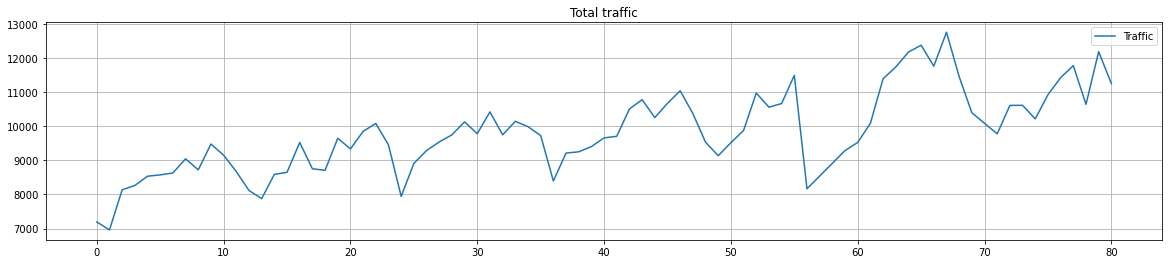

In [66]:
#Plotting time series

df4['Traffic'].plot(figsize=(20, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Total traffic')
plt.show(block=False)

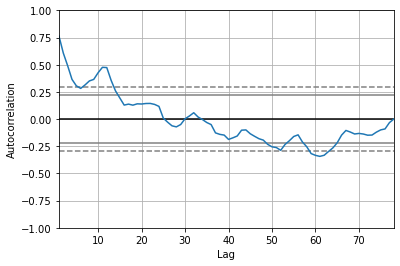

In [67]:
autocorrelation_plot(df4['Traffic'])
plt.show()
#We can see that there is positive correlation with the first 10-15 lags and next 22-25 lags
#that is perhaps significant for first two 

In [68]:
#stationarity test(Dickey-Fuller Test)

def check_stationarity(y, lags_plots=20, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(df4['Traffic'])
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Traffic')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe series seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe series isn't stationary")

Results of Dickey-Fuller Test:
Test Statistic                 -3.2435
p-value                         0.0176
Lags Used                       0.0000
Number of Observations Used    77.0000
Critical Value (1%)            -3.5183
Critical Value (5%)            -2.8999
Critical Value (10%)           -2.5872
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The series seems to be stationary


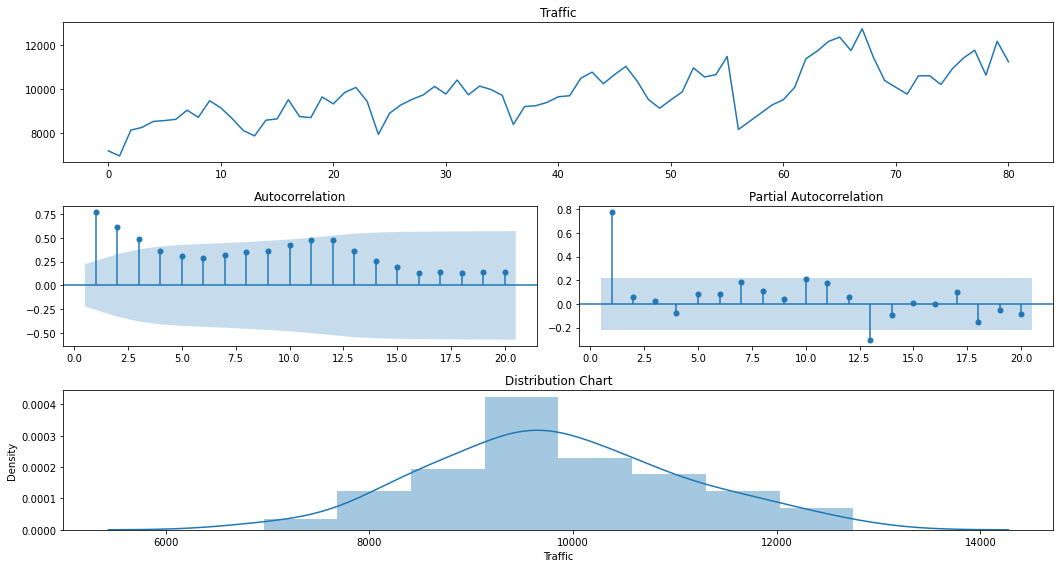

In [69]:
check_stationarity(df4['Traffic'])

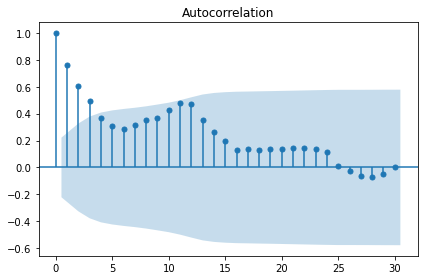

In [70]:
#ACF plot

plot_acf(df4['Traffic'], lags=30);

plt.tight_layout()

plt.savefig('ACFts.png', dpi=300)

# Data preparation for Time Series Modelling

In [71]:
TrainF= df4.iloc[:79]
TrainF.tail()


,Month_year,Traffic
76,2021-11-01,11420.75
77,2021-12-01,11775.50
78,2022-01-01,10639.75
79,2022-02-01,12182.75
80,2022-03-01,11249.50


In [72]:
TrainF.columns = ['Month_year','Traffic']
TrainF['Month_year'] = pd.to_datetime(df4['Month_year'], format='%m/%Y')
TrainF = TrainF.set_index('Month_year')
TrainF.head()

,Traffic
Month_year,
2015-07-01,7194.50
2015-08-01,6961.25
2015-09-01,8137.25
2015-10-01,8263.25
2015-11-01,8534.50


In [73]:
#Traget column 'traffic' conversion to time series
Train4=pd.Series(TrainF['Traffic'])

# SARIMA model for final prediction

In [74]:
#AIC values calculated and the best obtained is used on the time series to get the prediction for next 6 months using SARIMA model

In [75]:
best_model4 = sm.tsa.statespace.SARIMAX(Train4, order=(1,1,1), seasonal_order=(1, 1, 0, 12)).fit(dis=-1)
print(best_model4.summary())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                      SARIMAX Results                                      
Dep. Variable:                             Traffic   No. Observations:                   78
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -527.131
Date:                             Fri, 01 Jul 2022   AIC                           1062.261
Time:                                     04:34:02   BIC                           1070.959
Sample:                                          0   HQIC                          1065.693
                                              - 78                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5984      0.108      5.551      0.000       0.387       0.810
ma.L1         -0.9541      

In [76]:
#Getting Predictions from Apr'22 to Sep'22

index_future_dates=pd.date_range(start='2022-04',end='2022-10',freq='M')
Prediction = best_model4.predict(start=len(Train4) ,end= Train4.shape[0] + 5,typ='levels')
Prediction.index= index_future_dates
print (Prediction)

2022-04-30    10995.220956
2022-05-31    10994.939370
2022-06-30     9422.676814
2022-07-31    10474.099712
2022-08-31    10632.878156
2022-09-30    10668.946664
Freq: M, Name: predicted_mean, dtype: float64


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [77]:
#Plotting the train data and the final predictions

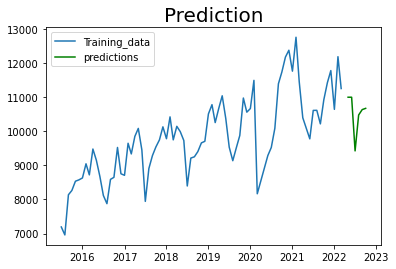

In [78]:
plt.title('Prediction', size=20)
plt.plot(TrainF['Traffic'], label= 'Training_data')
plt.plot(Prediction, color='green', label= 'predictions')
plt.legend();

In [79]:
#Viewing predictions for a year(additional)
index_future_dates=pd.date_range(start='2022-04',end='2023-01',freq='M')
L5=best_model4.predict(start=len(Train4) ,end= Train4.shape[0] + 8,typ='levels')
L5.index= index_future_dates
print (L5)

2022-04-30    10995.220956
2022-05-31    10994.939370
2022-06-30     9422.676814
2022-07-31    10474.099712
2022-08-31    10632.878156
2022-09-30    10668.946664
2022-10-31    11644.054410
2022-11-30    12092.534163
2022-12-31    12489.082992
Freq: M, Name: predicted_mean, dtype: float64


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


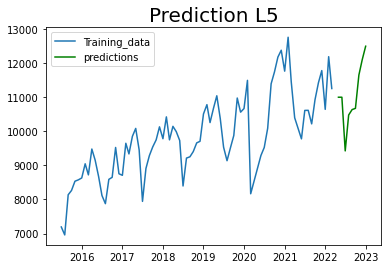

In [80]:
plt.title('Prediction L5', size=20)
#plt.figure(figsize=(20,5))
plt.plot(TrainF['Traffic'], label= 'Training_data')
plt.plot(L5, color='green', label= 'predictions')
plt.legend();